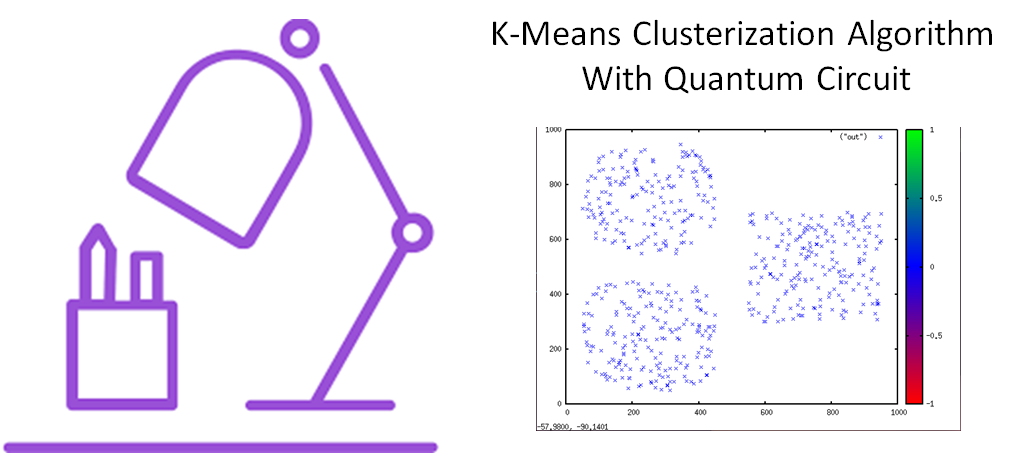

By Claudio Retico and Ennio Picarelli
## Part 1 - Classic Calculation

## Let's have a look to K-means	algorithm

After the linear regression faced in the previous notebook we now deal with K-means.
K-means is an unsupervised machine learning algorithm for identifying homogeneous groups in a data set. Unsupervised because the training phase of the model does not involve the use of labelled data but the recognition of groups takes place autonomously. The fields of use are numerous and vary from the recognition of similar behaviors in consumers (market segmentation) to design custom marketing campaigns, the grouping of documents talking of the same topic (clusters) to the reduction of the size of image files with a reduction of the basic colors, etc.. 

In this work we will show some applications of K-means in the classification of data starting from the use of classical libraries present on Python and arriving at the use of a quantum circuit that promises a significant theoretical processing speed-up. 

In extreme synthesis, the algorithm is based on the identification of an optimal number of groups in which to divide the data, from the iterative identification of the centers (centroids) of these groups in the n-dimensional space of the features of the data and from the contextual association of the same data to the various groups. The algorithm is iterative and starts from an initial random assignment of the centroids, then groups the data for greater proximity to the centroids, recalculates the new centroids as the midpoint, for each group, of the data belonging to it and starts again. When the position of the centroids and the belonging of the data to the groups does not vary, it is assumed that the algorithm converges.

The objective of K-means optimization is to minimize the quadratic error of the dispersion of the points with respect to the centroids, which is equivalent to minimizing the Euclidean distance from the centroids themselves. In the following we will see some mathematical details of the algorithm. 

 $x^{(i)}\ with\ i\ from\ 1\ to\ m\ =\ example\ data$

$c^{(i)}=index\ of\ cluster\ (1,2,3,..K)\ to\ which\ example\ datum\ x^{(i)}\ has\ been\ assigned \ (closest\ to\  x^{(i)})$

$\mu_k=\ k-th \ \ cluster\ centroid (\mu_k \in R^n)$

$\mu_c^{(i)}=\ centroid\ of\ cluster\ to\ which\ example\ has\ been\ assigned$

Optimization\ Objective

$J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_K)=\frac{1}{m} \sum_{j=1}^{m}||{(x^{(i)}-\mu_c(i)}||^2$

$\ \ min\ J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_K)\$

$c^{(i)},...,c^{(m)}$

$\mu_1,...,\mu_K$

Randomly initialize $ k$ Cluster Centroids: $\mu_1,\mu_2,\mu_3,\mu_k \in R^n\ then$

$Repeat \{ $

$      \quad \ For\ i=1\ to\ n$

$      \quad\quad \ \ \ c^{(i)}:=index\ (from\ 1\ to\ k)\ of\ cluster\ centroid\ closest\ to\ x^{(i)}$

$      \quad\quad \ For\ k=1\ to\ K$

$      \quad\quad\quad\ \ \ \mu_k:=average(mean)\ of\ points\ assigned\ to\ cluster$

$\}$

The right definition of the K number of centroids can be supported by means of some tools, the most common is the 
Elbow method
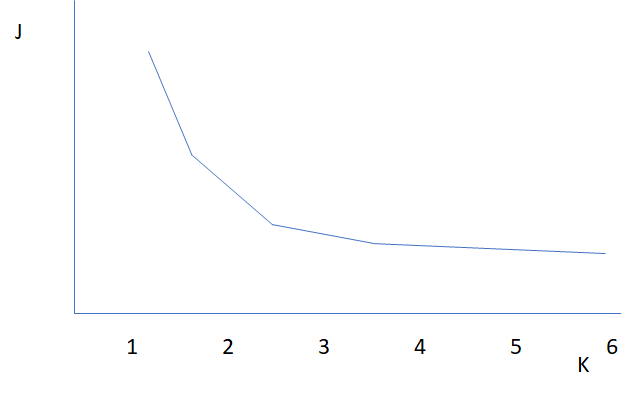

In this method the value of J is calculated for various numbers of K and the elbow point of the curve will be choosen as the right K value for calculation (in the curve case the value is 2).

# Example of classic clustering and quantum dataset setup
Clustering is performed on sample data from public datasets on Kaggle related to market segmentation.
Clustering is first performed on normal Cartesian coordinates.
Clustering Cartesian coordinates are the two parameters of __annual income__ and __spending score__
The Elbow method is also used to determine the optimal number of clusters.
The calculation is then repeated by transforming the calculating dataset:

Theta = arctan(annual income/spending score)*10000$

(Multiplies by 10,000 to improve accuracy)

Then clustering is performed with respect to the dimensions __customer ID__ and __Theta__

It is observed that both the number of clusters and the clustering maintain the topological validity

20 points are chosen to perform the quantum calculation (only 20 points are chosen to avoid processing too long)

In [ ]:
#importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization


In [ ]:
#reading the dataset
import sys
import types
import pandas as pd

df_data_2 = pd.read_csv('Mall_Customers.csv')
df_data_2.head()
dataset=df_data_2

dataset.head(10) #Prints first 10 rows of the dataset

## Determination of the correlation between Spending Score and other parameters

In [ ]:
# Mapping the gender column in numerical values
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender_codes'] = dataset['Gender'].cat.codes

In [ ]:
# Determining the pairplot matrix for correlation verification
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)

## Data verification and creation of the Theta column
The most relevant features for data clusterization are Spending Score and the Annual Income and therefore we decide to derive a new characteristic that is related to the ratio between these two parameters. In particular the derivate feature will be the arctangent of the ratio.

In [ ]:
#total rows and colums in the dataset
dataset.shape
dataset.info() # there are no missing values as all the columns has 200 entries properly

In [ ]:
#adding theta angle for only 2 features (Annual income and Spending Score)
dataset['Teta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(float))*10000.
dataset.head(10)

## Data display of the model to be clustered

In [ ]:
### Feature slelection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values.astype(int)

In [ ]:
#Visualizes data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

## Creating the model with sklearn
First of all we must find the right K value

In [ ]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=10000,tol=0.000001)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(20,10))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

## The elbow of the curve is corresponding to 5 clusters so we will build the model for K=5

In [ ]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [ ]:
#showing the cluster to which the point belongs
print('y_kmeans=',y_kmeans)
#Centroid position
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print('centers=',centers)

In [ ]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')      
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


# Model transformation by switching to Theta + customer ID
Now we will show that the clusterization doesn't change if we substitute the previous features with Theta + Customer ID

In [ ]:
### Feature slelection for the model
#Considering only 2 features (ID + Theta) and no Label available
X= dataset.iloc[:, [0,6]].values.astype(int)

In [ ]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers (Teta Mode)')
plt.xlabel('Customer')
plt.ylabel('Teta')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#We can see that the elbow value for k is 5. We have tha same behavior even with wider k range
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42,max_iter=200000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [ ]:
#shows to which cluster the point belongs
print(y_kmeans)
#centroids position
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print(centers)

In [ ]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')      
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Mode')
plt.xlabel('Customer')
plt.ylabel('Teta')
plt.legend()
plt.grid()
plt.show()


# Reduced data loading for IBM Q simulation
In order to perform, in the next part of the notebook, the calculation even with Quantum Circuit we need to reduce the number of data occurrences.

In [ ]:
df_data_3 = pd.read_csv('DataForQComparison.csv')
df_data_3.head()
dataset=df_data_3

In [ ]:
#total rows and colums in the dataset
dataset.shape

In [ ]:
#add teta angle for only 2 features (Annual income and Spending Score)
dataset['Teta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(int))*10000
dataset['ID']=dataset.reset_index().index
dataset.head(10)

## Clustering on reduced data and standard features

In [ ]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [0,1]].values.astype(int)

In [ ]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

## We go directly to Clustering calculation on Theta and Customer ID

In [ ]:
### Feature sleection for the model
#Considering only 2 features (ID + Theta) and no Label available
X= dataset.iloc[:, [3,2]].values.astype(float)

In [ ]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers (Teta Mode)')
plt.xlabel('Customer')
plt.ylabel('Teta')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=10000,tol=0.000001)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(20,10))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [ ]:
#shows to which cluster point belongs
print(y_kmeans)

In [ ]:
#centroid position
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print(centers)

In [ ]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')      
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Mode')
plt.xlabel('Customer')
plt.ylabel('Teta')
plt.legend()
plt.grid()
plt.show()